In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

from torchvision import datasets, transforms

https://github.com/remi2257/sudoku-solver/blob/master/src/extract_n_solve/grid_detector.py#L128

In [2]:
import PIL

In [3]:
import skimage
from skimage import filters as anything

In [4]:
# Using Otsu Treshold Mentoned in
# Tensmeyer, C., Martinez, T. Historical Document Image Binarization: 
# A Review. SN COMPUT. SCI. 1, 173 (2020). https://doi.org/10.1007/s42979-020-00176-1

def binarize_image(img_array):
    
    otsu_thresh = skimage.filters.threshold_otsu(img_array)

    otsu_threshold_indices_0 = img_array < otsu_thresh

    output_img_array = otsu_threshold_indices_0*255
    
    return output_img_array

In [5]:
f2g = lambda x: int(255) if (x == 1.0) else int(np.floor(x*256))

vectorized_float2gray = np.vectorize(f2g)

def float2gray(flt):
    return vectorized_float2gray(flt)

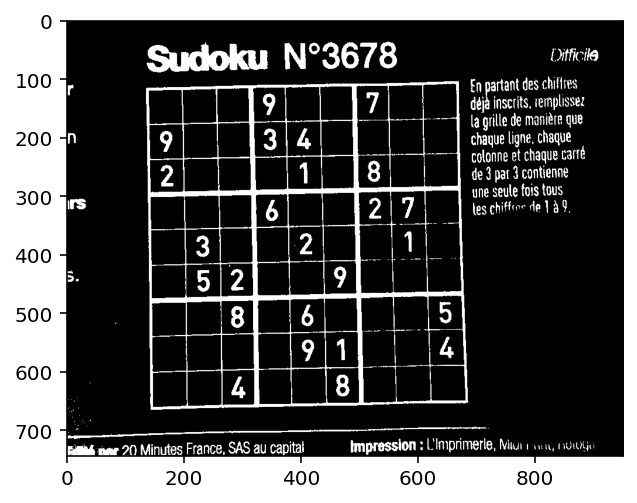

In [6]:
image = PIL.Image.open('images_test/sudoku.jpg').convert('L')

img_array = np.asarray(image)

# option 1
plt.imshow(binarize_image(img_array) , cmap='gray', vmin=0, vmax=255)

# option 2
#smooth = skimage.filters.gaussian(img_array, 
#                                  sigma=2,
#                                  truncate=2.0)
#
#img = float2gray(smooth)

#plt.imshow(binarize_image( img ) , cmap='gray', vmin=0, vmax=255)


plt.show()

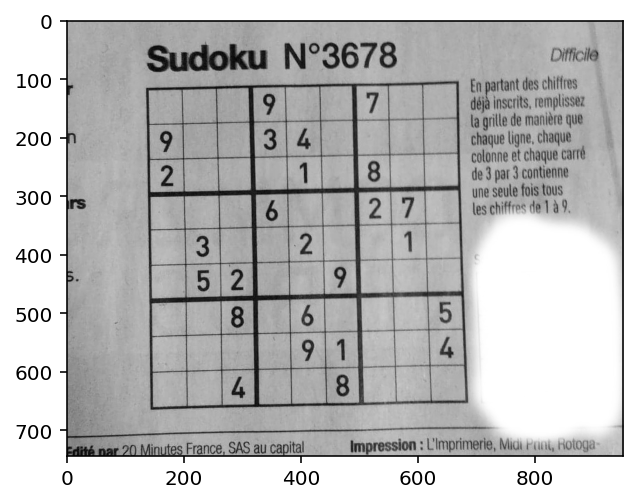

In [7]:
image = PIL.Image.open('images_test/sudoku.jpg').convert('L')
npimg = np.asarray(image)
plt.imshow(npimg, cmap='gray', vmin=0, vmax=255)
plt.show()

In [8]:
npimg.min()

0

In [9]:
npimg.max()

255

(array([1.0000e+00, 1.4000e+01, 1.8000e+01, 3.4000e+01, 7.4000e+01,
        6.0000e+01, 7.5000e+01, 9.9000e+01, 1.2800e+02, 1.6100e+02,
        2.0500e+02, 2.7200e+02, 3.0900e+02, 3.4400e+02, 3.8700e+02,
        4.4100e+02, 4.8300e+02, 5.4800e+02, 5.8200e+02, 6.7700e+02,
        7.1800e+02, 7.7200e+02, 8.6400e+02, 9.0700e+02, 8.8700e+02,
        9.5400e+02, 9.8400e+02, 9.3200e+02, 9.8700e+02, 9.5600e+02,
        9.4500e+02, 9.1000e+02, 9.0300e+02, 9.0400e+02, 9.5600e+02,
        9.5500e+02, 8.7800e+02, 9.0400e+02, 8.8800e+02, 8.8300e+02,
        8.7500e+02, 8.1800e+02, 9.0800e+02, 8.3500e+02, 8.0500e+02,
        8.2400e+02, 7.6000e+02, 7.2400e+02, 7.3800e+02, 7.6600e+02,
        7.2700e+02, 7.3000e+02, 7.3500e+02, 7.1800e+02, 6.8700e+02,
        6.9200e+02, 6.9800e+02, 6.3300e+02, 7.0700e+02, 6.6800e+02,
        6.4100e+02, 6.4700e+02, 6.2200e+02, 6.5500e+02, 6.5500e+02,
        6.3100e+02, 6.2700e+02, 6.0900e+02, 6.1200e+02, 6.0900e+02,
        5.7400e+02, 5.8100e+02, 5.9000e+02, 6.06

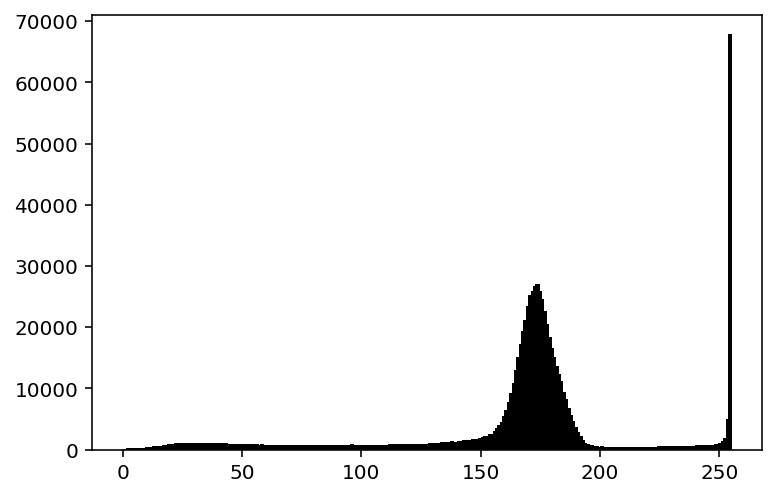

In [10]:
plt.hist(npimg.ravel(), bins=256, range=(0, 255), fc='k', ec='k')

https://github.com/remi2257/sudoku-solver/blob/master/src/extract_n_solve/grid_detector.py#L130

In [11]:
gray_enhance = (npimg - npimg.min()) * int(255 / (npimg.max() - npimg.min()))

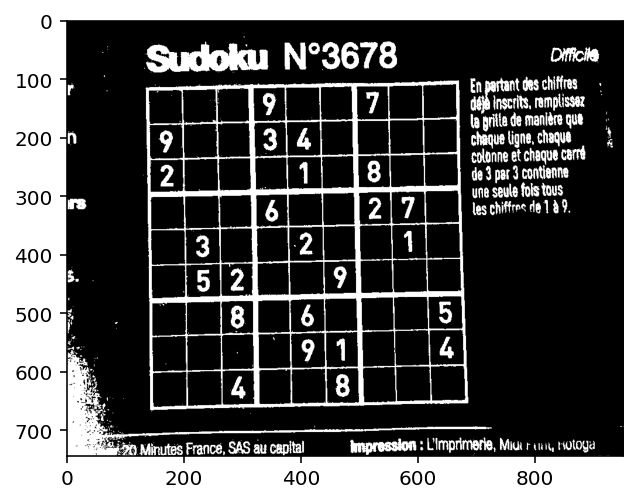

In [12]:
npimg_thresh = npimg.mean()
npimg_thresh = 150
#gray_enhance = [1 if a_ >= npimg_mean else 0 for a_ in npimg]
super_threshold_indices_0 = npimg < npimg_thresh
super_threshold_indices_1 = npimg >= npimg_thresh

npimg2 = npimg.copy()

npimg2[super_threshold_indices_0] = 255
npimg2[super_threshold_indices_1] = 0

plt.imshow(npimg2, cmap='gray', vmin=0, vmax=255)
plt.show()

(array([600696.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

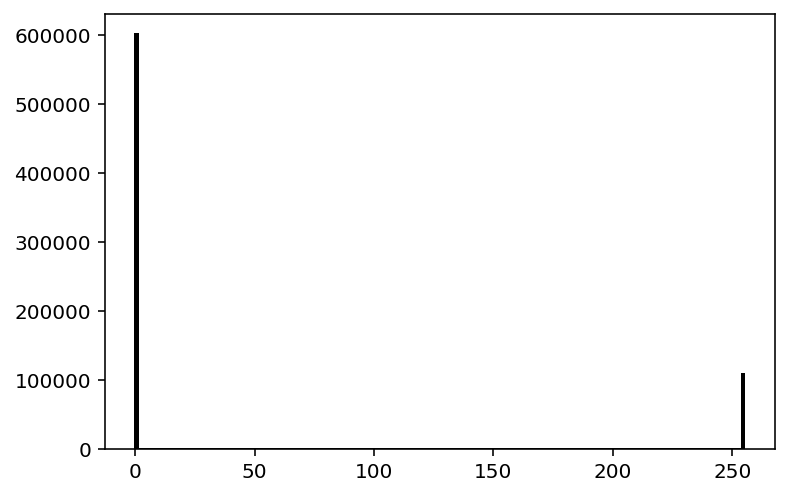

In [13]:
plt.hist(npimg2.ravel(), bins=256, range=(0, 255), fc='k', ec='k')

```
Using Otsu Treshold Mentoned in
Tensmeyer, C., Martinez, T. Historical Document Image Binarization: A Review. SN COMPUT. SCI. 1, 173 (2020). https://doi.org/10.1007/s42979-020-00176-1
```

In [14]:
from skimage import filters

In [15]:
otsu_thresh = filters.threshold_otsu(npimg)

In [16]:
otsu_thresh

124

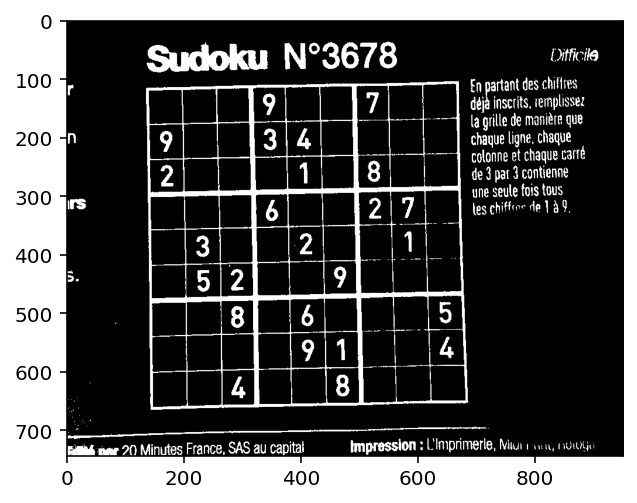

In [17]:
otsu_threshold_indices_0 = npimg < otsu_thresh
otsu_threshold_indices_1 = npimg >= otsu_thresh

npimg3 = npimg.copy()

npimg3[otsu_threshold_indices_0] = 255
npimg3[otsu_threshold_indices_1] = 0

plt.imshow(npimg3, cmap='gray', vmin=0, vmax=255)
plt.show()

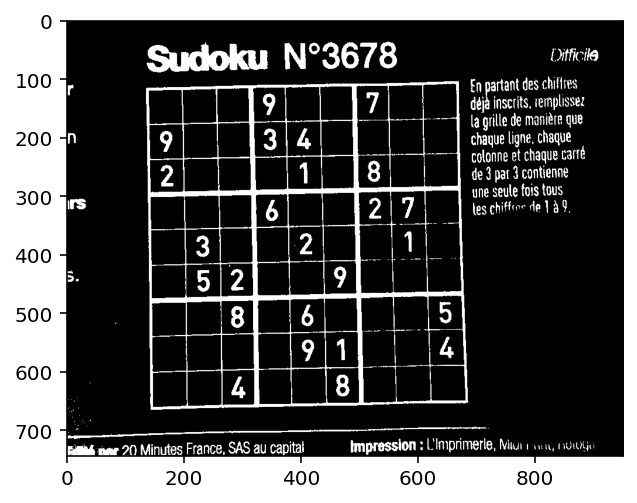

In [18]:
npimg4 = otsu_threshold_indices_0*255

plt.imshow(npimg4, cmap='gray', vmin=0, vmax=255)
plt.show()

import os
import PIL

class CustomDataSet(torch.utils.data.Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        all_imgs = os.listdir(main_dir)
        self.total_imgs = sorted(all_imgs)
# natsort.natsorted(all_imgs)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        image = PIL.Image.open(img_loc).convert("RGB")
        tensor_image = self.transform(image)
        return tensor_image

img_folder_path = 'images_test'
trsfm = transforms.Compose([transforms.ToTensor()])

my_dataset = CustomDataSet(img_folder_path, transform=trsfm)
train_loader = torch.utils.data.DataLoader(my_dataset , batch_size=1, shuffle=False, 
                               num_workers=1, drop_last=False)
#Then iterate:

for idx, img in enumerate(train_loader):
    #print(idx)
    #print(img.shape)
    
    npimg = img[0].numpy()
    #plt.imshow(np.transpose(npimg, (1,2,0)))
    
    to_pil = torchvision.transforms.ToPILImage()
    img2 = to_pil(npimg)
    
    img3 = torchvision.transforms.functional.to_grayscale(img2, num_output_channels=1)
    #plt.imshow(np.transpose(img3, (1,2,0)))
    print(img3.shape)

image = PIL.Image.open('images_test/sudoku.jpg').convert('L')
#plt.imshow(np.transpose(np.asarray(content.squeeze()),(1,2,0)))
#plt.imshow(np.transpose(image,(1,2,0)))
npimg = np.asarray(image)
print(npimg.shape)
#plt.imshow(np.transpose(np.asarray(image),(1,2,0)))
plt.imshow(npimg, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.hist(npimg.ravel(), bins=256, range=(0, 255), fc='k', ec='k')

npimg.max()

npimg.min()

# get grayscale image

data_dir = 'images_test'
#transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
#transforms.ToTensor()])
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1)])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)
print(type(dataloader))

#images, labels = next(iter(dataloader))
#helper.imshow(images[0], normalize=False)
#plt.imshow(images[0])

#dataiter = iter(dataloader)
#images = dataiter.next()
#
#def imshow(img):
#    #img = img / 2 + 0.5
#    npimg = img.numpy()
#    plt.imshow(np.transpose(npimg, (1, 2, 0)))
#    plt.show()
#
## show images
## print(images[0])
#imshow(torchvision.utils.make_grid(images[0]))
#print(sizeof(enumerate(dataloader)))

#for batch_idx, (data, target) in enumerate(dataloader):
#    type(data)


dir(dataiter)

type(images[0])

images[0].shape

images[0]

images[0].numpy()[0][0][743][951]

torch.max(images[0])

npi=torchvision.utils.make_grid(images[0])
npi.numpy()

https://github.com/remi2257/sudoku-solver/blob/master/src/extract_n_solve/grid_detector.py#L130

torch.unique(images[0], sorted=True, return_counts=True)